# DL Assignment 10
## Sargun Singh (102115078) 4O1D

**Q1** *Develop an ANN model to analyze the implementation of Dropout as regularization.*

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load and Preprocess the Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 22s 2us/step


In [3]:
# Flatten the 28x28 images into vectors of size 784
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
# Define the ANN Model with Dropout
def create_model(dropout_rate=0.0):
    model = Sequential([
        Dense(512, activation='relu', input_shape=(784,)),
        Dropout(dropout_rate),  # Apply Dropout
        Dense(256, activation='relu'),
        Dropout(dropout_rate),  # Apply Dropout
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')  # Output layer
    ])
    return model

In [5]:
# Compile the Model
def compile_and_train(model, epochs=10):
    model.compile(
        optimizer=Adam(),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    history = model.fit(
        x_train, y_train,
        validation_data=(x_test, y_test),
        epochs=epochs,
        batch_size=128,
        verbose=1
    )
    return history

In [6]:
# Model without Dropout
model_no_dropout = create_model(dropout_rate=0.0)
history_no_dropout = compile_and_train(model_no_dropout, epochs=10)

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8728 - loss: 0.4392 - val_accuracy: 0.9665 - val_loss: 0.1079
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9735 - loss: 0.0879 - val_accuracy: 0.9771 - val_loss: 0.0731
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9827 - loss: 0.0554 - val_accuracy: 0.9746 - val_loss: 0.0807
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9884 - loss: 0.0353 - val_accuracy: 0.9757 - val_loss: 0.0796
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9901 - loss: 0.0300 - val_accuracy: 0.9792 - val_loss: 0.0775
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9932 - loss: 0.0214 - val_accuracy: 0.9795 - val_loss: 0.0822
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9938 - loss: 0.0180 - val_accuracy: 0.9800 - val_loss: 0.0747
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9940 - loss: 0.0188 - val_accu

In [8]:
# Model with Dropout (rate = 0.5)
model_with_dropout = create_model(dropout_rate=0.5)
history_with_dropout = compile_and_train(model_with_dropout, epochs=10)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7722 - loss: 0.7043 - val_accuracy: 0.9578 - val_loss: 0.1353
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9424 - loss: 0.1877 - val_accuracy: 0.9675 - val_loss: 0.1045
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9541 - loss: 0.1484 - val_accuracy: 0.9744 - val_loss: 0.0832
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9645 - loss: 0.1214 - val_accuracy: 0.9764 - val_loss: 0.0814
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9651 - loss: 0.1134 - val_accuracy: 0.9768 - val_loss: 0.0748
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9703 - loss: 0.0980 - val_accuracy: 0.9766 - val_loss: 0.0714
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9715 - loss: 0.0925 - val_accuracy: 0.9788 - val_loss: 0.0695
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9732 - loss: 0.0844 - val_accu

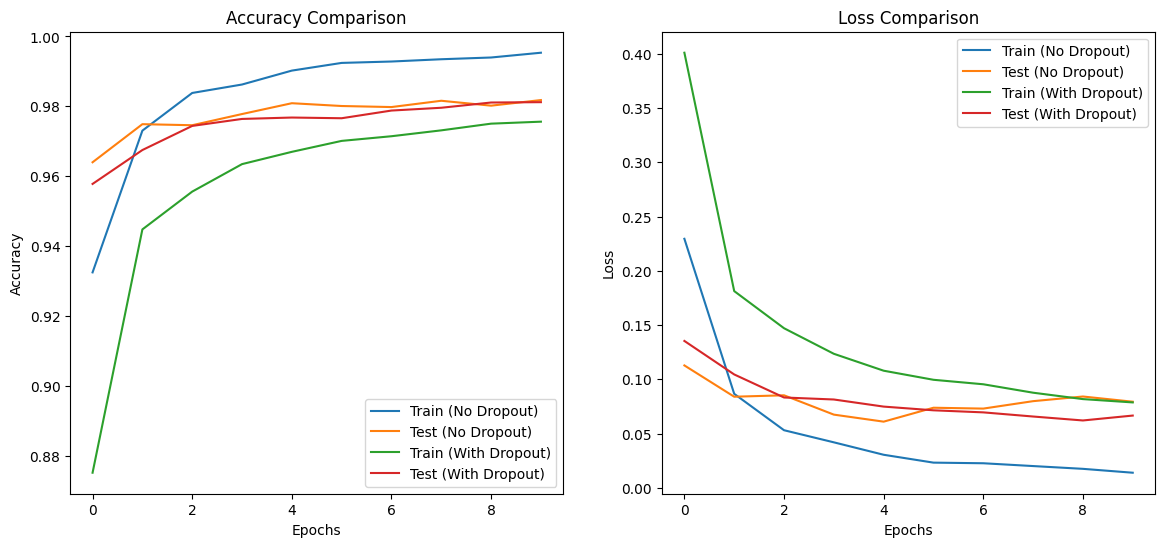

In [9]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history_no_dropout.history['accuracy'], label='Train (No Dropout)')
plt.plot(history_no_dropout.history['val_accuracy'], label='Test (No Dropout)')
plt.plot(history_with_dropout.history['accuracy'], label='Train (With Dropout)')
plt.plot(history_with_dropout.history['val_accuracy'], label='Test (With Dropout)')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history_no_dropout.history['loss'], label='Train (No Dropout)')
plt.plot(history_no_dropout.history['val_loss'], label='Test (No Dropout)')
plt.plot(history_with_dropout.history['loss'], label='Train (With Dropout)')
plt.plot(history_with_dropout.history['val_loss'], label='Test (With Dropout)')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [10]:
# Evaluate Models
print("Evaluation of Model Without Dropout:")
model_no_dropout.evaluate(x_test, y_test, verbose=0)

print("\nEvaluation of Model With Dropout:")
model_with_dropout.evaluate(x_test, y_test, verbose=0)

Evaluation of Model Without Dropout:

Evaluation of Model With Dropout:


[0.06656207144260406, 0.9811999797821045]